# The Model
Nearest neighbors does not make any mathematical assumptions or require a lot of dependencies. It only requires a way to calculate distance and the assumption that proximate points are similar. One downside is that nearest neighbors does not take all of the information ino account--it only makes predictions based on a handful of points closest to the one of interest.

In [1]:
%%capture
%run "4 - Linear Algebra.ipynb"

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count for count in vote_counts.values() if count == winner_count])
    
    if num_winners == 1:
        return winner # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""
    
    def key_func(point):
        p, _ = point
        return distance(p, new_point)
    
    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points, key=key_func)
    
    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    # and let them vote
    return majority_vote(k_nearest_labels)

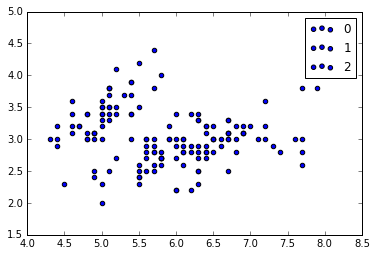

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

iris_0 = iris.data[iris.target == 0]
iris_1 = iris.data[iris.target == 1]
iris_2 = iris.data[iris.target == 2]

plt.scatter(iris_0[:, 0], iris_0[:, 1], label='0');
plt.scatter(iris_1[:, 0], iris_1[:, 1], label='1');
plt.scatter(iris_2[:, 0], iris_2[:, 1], label='2');
plt.legend();

In [4]:
# Classify a point that would lie at 6, 3
knn_classify(1, zip(iris.data[:, :2], iris.target), [6, 3])

2

In [5]:
# try several different values for k
for k in [1, 3, 5, 7, 15]:
    num_correct = 0
    num_total = 0
        
    for x in zip(iris.data[:, :2], iris.target):
        num_total += 1
        point, target = x
        other_iris = [(p, t) for (p, t) in zip(iris.data[:, :2], iris.target) if p[0] != point[0] and p[1] != point[1]]
        
        predicted_iris = knn_classify(k, other_iris, point)
        if predicted_iris == target: num_correct += 1
    
    print(k, "neighbor[s]:", num_correct, "correct out of", num_total)

1 neighbor[s]: 114 correct out of 150
3 neighbor[s]: 118 correct out of 150
5 neighbor[s]: 119 correct out of 150
7 neighbor[s]: 121 correct out of 150
15 neighbor[s]: 122 correct out of 150


You can use k-nearest to predict on novel data. Here is how our model makes prediction for the three possible target values:

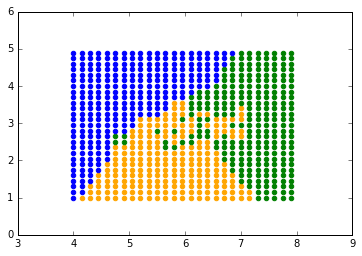

In [6]:
k = 1

for x in np.arange(4, 8, 0.15):
    for y in np.arange(1, 5, 0.15):
        predicted_iris = knn_classify(k, zip(iris.data[:, :2], iris.target), [x, y])
        color = ''
        if predicted_iris == 0:
            color = 'blue'
        elif predicted_iris == 1:
            color = 'orange'
        else:
            color = 'green'
        plt.scatter(x, y, color=color)

# The Curse Of Dimensionality
k-nearest neighbors can perform poorly on high-dimension data sets. This is due to the fact that points are not close together when data is high-dimensional.